## __*Atividade Avaliativa 03 - Parte 2*__

Considerando o conjunto de dados Heart Disease Data Set:
1. Explorar visualmente e numericamente os dados;
2. Preparar os conjunto de dados utilizando as técnicas ensinadas na disciplina, quando pertinente;
3. Criar agrupamentos utilizando K-Means e agrupamento hirárquico conforme estudado na disciplina.  Pesquisar também o DBSCAN, e aplicá-lo. Escolher a técnica que obteve melhor resultado justificando a resposta.
4. Enviar a URL do jupyter notebook no GitHub.
____________________

## __Identificação do problema__

Dentre os diversos datasets disponíveis, foi-se escolhido o processed.cleveland, que de acordo com a literatura pesquisada, é o que melhor se adapta aos problemas de Machine Learning.

O objetivo do problema é formar agrupamentos de acordo com as características das features, utilizando os algoritmos destinados a este fim.
________________________

## *Passo 1 - Setup do projeto*
#### Importação das bibliotecas e identificação do endereço de download do dataset.

In [1]:
import os
import urllib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'Matplot version: {mpl.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')
print(f'Seaborn version: {sns.__version__}')

DOWNLOAD_ROOT = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/'
HEART_PATH = os.path.join('data', 'raw')
HEART_URL = DOWNLOAD_ROOT + 'processed.cleveland.data' 

HEART_FILE = 'heart.csv'
HEART_DATA = os.path.join(HEART_PATH, HEART_FILE)

RANDOM_STATE = 42

print('\nConfiguração completa !')

Matplot version: 3.3.4
Numpy version: 1.19.2
Pandas version: 1.2.3
Scikit-learn version: 0.24.1
Seaborn version: 0.11.1

Configuração completa !


__________________________________
## *Passo 2 - Download e Carregamento dos Dados*
#### Download do dataset e carregamento do mesmo para um DataFrame.

In [2]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)
    
download_data(HEART_URL, HEART_PATH, HEART_FILE)

In [3]:
col_names = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral', 'blood_sugar',
             'resting_ecg', 'maximum_heart_rate', 'exercise_induced_angina', 'oldpeak',
             'slope_peak_exercise', 'major_vessels', 'thal', 'diagnosis']

In [4]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, header=None, names=col_names)

heart_df = load_data(HEART_PATH, HEART_FILE)

_____________________
## *Passo 3 - Análise Exploratória de Dados*
#### Análise dos dados buscando identificar dados inválidos e faltantes. Nessa etapa os dados serão transformados e normalizados, caso haja necessidade.

In [5]:
print(f'O dataframe heart_df possui {heart_df.shape[0]} linhas e {heart_df.shape[1]} colunas.')

O dataframe heart_df possui 303 linhas e 14 colunas.


In [6]:
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,oldpeak,slope_peak_exercise,major_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
heart_df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,oldpeak,slope_peak_exercise,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [8]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    float64
 2   chest_pain               303 non-null    float64
 3   resting_blood_pressure   303 non-null    float64
 4   cholestoral              303 non-null    float64
 5   blood_sugar              303 non-null    float64
 6   resting_ecg              303 non-null    float64
 7   maximum_heart_rate       303 non-null    float64
 8   exercise_induced_angina  303 non-null    float64
 9   oldpeak                  303 non-null    float64
 10  slope_peak_exercise      303 non-null    float64
 11  major_vessels            303 non-null    object 
 12  thal                     303 non-null    object 
 13  diagnosis                303 non-null    int64  
dtypes: float64(11), int64(1), 

In [9]:
# Verificação da possível existência de valores ausentes

val_ausentes = (heart_df[['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral', 'blood_sugar',
             'resting_ecg', 'maximum_heart_rate', 'exercise_induced_angina', 'oldpeak',
             'slope_peak_exercise', 'major_vessels', 'thal', 'diagnosis']] == '?').sum()

print(f'Quantidade de dados ausentes: \n{val_ausentes}')

Quantidade de dados ausentes: 
age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholestoral                0
blood_sugar                0
resting_ecg                0
maximum_heart_rate         0
exercise_induced_angina    0
oldpeak                    0
slope_peak_exercise        0
major_vessels              4
thal                       2
diagnosis                  0
dtype: int64


In [10]:
# Substituição dos valores ? por NaN

heart_df[['major_vessels', 'thal']] = heart_df[['major_vessels', 'thal']].replace('?', np.nan)

heart_df.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholestoral                0
blood_sugar                0
resting_ecg                0
maximum_heart_rate         0
exercise_induced_angina    0
oldpeak                    0
slope_peak_exercise        0
major_vessels              4
thal                       2
diagnosis                  0
dtype: int64

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    float64
 1   sex                      303 non-null    float64
 2   chest_pain               303 non-null    float64
 3   resting_blood_pressure   303 non-null    float64
 4   cholestoral              303 non-null    float64
 5   blood_sugar              303 non-null    float64
 6   resting_ecg              303 non-null    float64
 7   maximum_heart_rate       303 non-null    float64
 8   exercise_induced_angina  303 non-null    float64
 9   oldpeak                  303 non-null    float64
 10  slope_peak_exercise      303 non-null    float64
 11  major_vessels            299 non-null    object 
 12  thal                     301 non-null    object 
 13  diagnosis                303 non-null    int64  
dtypes: float64(11), int64(1), 

In [12]:
# Como eram poucos os valores NaN, foi-se optado por excluir todas as linhas onde os mesmos se encontravam

heart_df.dropna(axis=0, how='any', inplace=True)

In [13]:
heart_df['thal'] = heart_df['thal'].astype('float')
heart_df['major_vessels'] = heart_df['major_vessels'].astype('float')

In [14]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      297 non-null    float64
 1   sex                      297 non-null    float64
 2   chest_pain               297 non-null    float64
 3   resting_blood_pressure   297 non-null    float64
 4   cholestoral              297 non-null    float64
 5   blood_sugar              297 non-null    float64
 6   resting_ecg              297 non-null    float64
 7   maximum_heart_rate       297 non-null    float64
 8   exercise_induced_angina  297 non-null    float64
 9   oldpeak                  297 non-null    float64
 10  slope_peak_exercise      297 non-null    float64
 11  major_vessels            297 non-null    float64
 12  thal                     297 non-null    float64
 13  diagnosis                297 non-null    int64  
dtypes: float64(13), int64(1)
m

In [15]:
# Geração de uma cópia do dataset para utilização no algoritmo do Dendograma

heart_dend = heart_df.copy()

In [16]:
# Verificação dos valores existentes na feature alvo

heart_df['diagnosis'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [17]:
# Criação de uma matriz tipo Numpy para utilização nos algoritmos, excluindo-se a feature alvo

heart = heart_df.iloc[:,:-1].values
heart_dbscan = heart.copy()
heart

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [68.,  1.,  4., ...,  2.,  2.,  7.],
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.]])

_____________
## *Passo 4 - Geração dos clusters utilizando o algoritmo KMeans*
#### Nessa etapa, o dataset será analisado pelo algoritmo, sendo criados os clusters de acordo com as características das features.

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=RANDOM_STATE, init='k-means++')
y_kmeans = kmeans.fit_predict(heart)

In [19]:
y_kmeans

array([1, 0, 0, 1, 3, 1, 1, 4, 0, 3, 3, 4, 0, 1, 3, 3, 1, 1, 0, 1, 3, 4,
       4, 1, 3, 1, 4, 0, 1, 3, 1, 1, 4, 1, 1, 1, 3, 0, 4, 0, 0, 3, 4, 3,
       4, 1, 3, 0, 2, 3, 3, 3, 4, 1, 0, 0, 1, 3, 0, 3, 4, 3, 3, 4, 3, 0,
       3, 1, 4, 1, 0, 1, 0, 1, 3, 4, 0, 4, 1, 0, 3, 0, 4, 0, 4, 1, 1, 1,
       1, 4, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 4, 0, 3, 4, 3, 1, 0, 3, 4,
       1, 3, 4, 0, 3, 3, 3, 4, 0, 1, 2, 1, 3, 4, 1, 0, 0, 1, 3, 1, 1, 1,
       1, 1, 1, 3, 0, 3, 1, 1, 4, 1, 4, 1, 1, 0, 1, 4, 4, 4, 0, 2, 4, 0,
       4, 4, 4, 4, 0, 3, 4, 1, 0, 1, 3, 4, 4, 3, 0, 0, 0, 2, 3, 0, 1, 3,
       4, 1, 1, 2, 1, 0, 4, 3, 1, 0, 4, 0, 3, 4, 0, 3, 4, 0, 1, 1, 0, 1,
       4, 3, 4, 3, 4, 0, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 4, 1, 1, 1, 3,
       0, 1, 1, 3, 4, 3, 3, 3, 4, 3, 0, 3, 0, 0, 1, 1, 4, 1, 4, 1, 1, 3,
       0, 1, 0, 1, 3, 3, 0, 0, 4, 4, 1, 1, 3, 0, 0, 1, 4, 1, 1, 3, 4, 3,
       1, 3, 3, 0, 4, 3, 3, 1, 0, 1, 1, 3, 4, 1, 3, 3, 3, 4, 1, 1, 1, 3,
       4, 3, 3, 3, 3, 3, 0, 0, 3, 3, 1])

In [20]:
# Contagem dos elementos de cada cluster

from collections import Counter

Counter(kmeans.labels_)

Counter({1: 97, 0: 57, 3: 80, 4: 58, 2: 5})

In [21]:
# Verificação se as labels foram corretamente preservadas

y_kmeans is kmeans.labels_

True

In [22]:
# Identificação dos centróides das features Age e Cholesterol

centroids = kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 4]

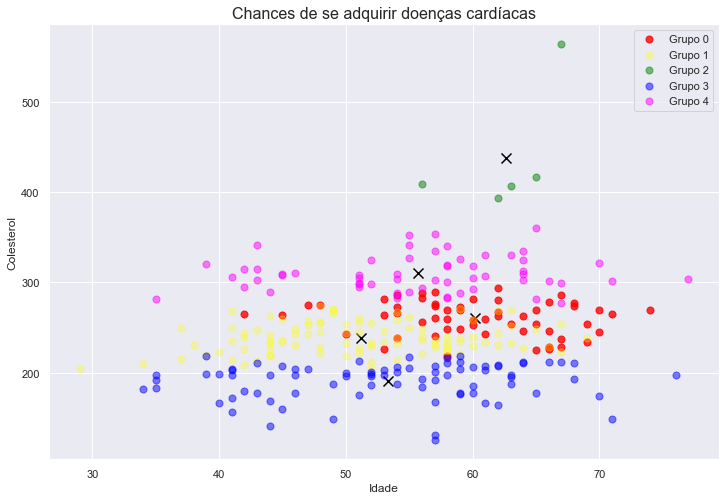

In [23]:
sns.set()
plt.figure(figsize=(12, 8))

_ = plt.scatter(centroids_x, centroids_y, c='black', marker='x', s=100)

plt.scatter(heart[y_kmeans == 0, 0], heart[y_kmeans == 0, 4], s = 50, c = 'red', label = 'Grupo 0', alpha=0.8)
plt.scatter(heart[y_kmeans == 1, 0], heart[y_kmeans == 1, 4], s = 50, c = 'yellow', label = 'Grupo 1', alpha=0.3)
plt.scatter(heart[y_kmeans == 2, 0], heart[y_kmeans == 2, 4], s = 50, c = 'green', label = 'Grupo 2', alpha=0.5)
plt.scatter(heart[y_kmeans == 3, 0], heart[y_kmeans == 3, 4], s = 50, c = 'blue', label = 'Grupo 3', alpha=0.5)
plt.scatter(heart[y_kmeans == 4, 0], heart[y_kmeans == 4, 4], s = 50, c = 'magenta', label = 'Grupo 4', alpha=0.5)
plt.title('Chances de se adquirir doenças cardíacas', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Colesterol', fontsize=12)
plt.legend()
plt.show()

In [24]:
# Comparação dos clusters gerados com as labels originais da feature alvo

df = pd.DataFrame({'Grupos': y_kmeans, 'diagnosis': heart_df['diagnosis']})
ct = pd.crosstab(df['Grupos'], df['diagnosis'])
print(ct)

diagnosis   0   1   2   3  4
Grupos                      
0          18  14  12  10  3
1          67  15   5   8  2
2           3   0   1   0  1
3          45  12   8  11  4
4          27  13   9   6  3


In [25]:
ks = range(1, 9)
inercias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(heart)
    inercias.append(model.inertia_)

C:\Users\lflav\anaconda3\envs\ciencia_de_dados\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


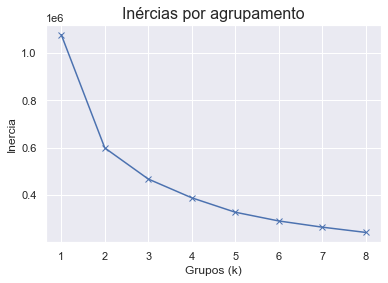

In [26]:
_ = plt.plot(ks, inercias, 'x-')
_ = plt.title('Inércias por agrupamento', fontsize=16)
_ = plt.xlabel('Grupos (k)')
_ = plt.ylabel('Inercia')
_ = plt.xticks(ks)

In [27]:
# Análise da silhueta dos clusters do KMeans

from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, random_state=RANDOM_STATE).fit(heart) for k in range(1, 10)]
silhouette_scores = [silhouette_score(heart, modelo.labels_) for modelo in kmeans_per_k[1:]]

C:\Users\lflav\anaconda3\envs\ciencia_de_dados\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [28]:
silhouette_scores

[0.38579258761422547,
 0.284067023151633,
 0.28018544876175333,
 0.2766776013286208,
 0.26424936335170296,
 0.2537956889863694,
 0.2388163668096143,
 0.2548680128061167]

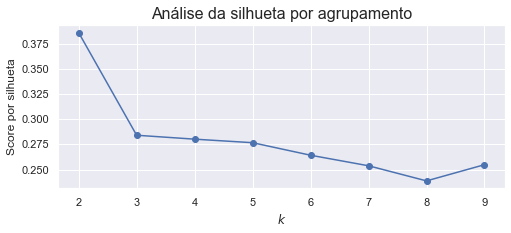

In [29]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.title('Análise da silhueta por agrupamento', fontsize=16)
plt.xlabel("$k$")
plt.ylabel("Score por silhueta")
plt.show()

_____________
## *Passo 5 - Geração dos clusters utilizando o agrupamento hierárquico*
#### Nessa etapa, o dataset será analisado pelo algoritmo, sendo criados os clusters de acordo com as características das features e gerado uma gráfico do tipo dendograma.

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [31]:
heart_dend.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,blood_sugar,resting_ecg,maximum_heart_rate,exercise_induced_angina,oldpeak,slope_peak_exercise,major_vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [32]:
indices = list(heart_dend.index)

In [33]:
from sklearn.preprocessing import normalize
heart_dend_norm = normalize(heart_dend)

In [34]:
mesclagens = linkage(heart_dend_norm, method='complete')

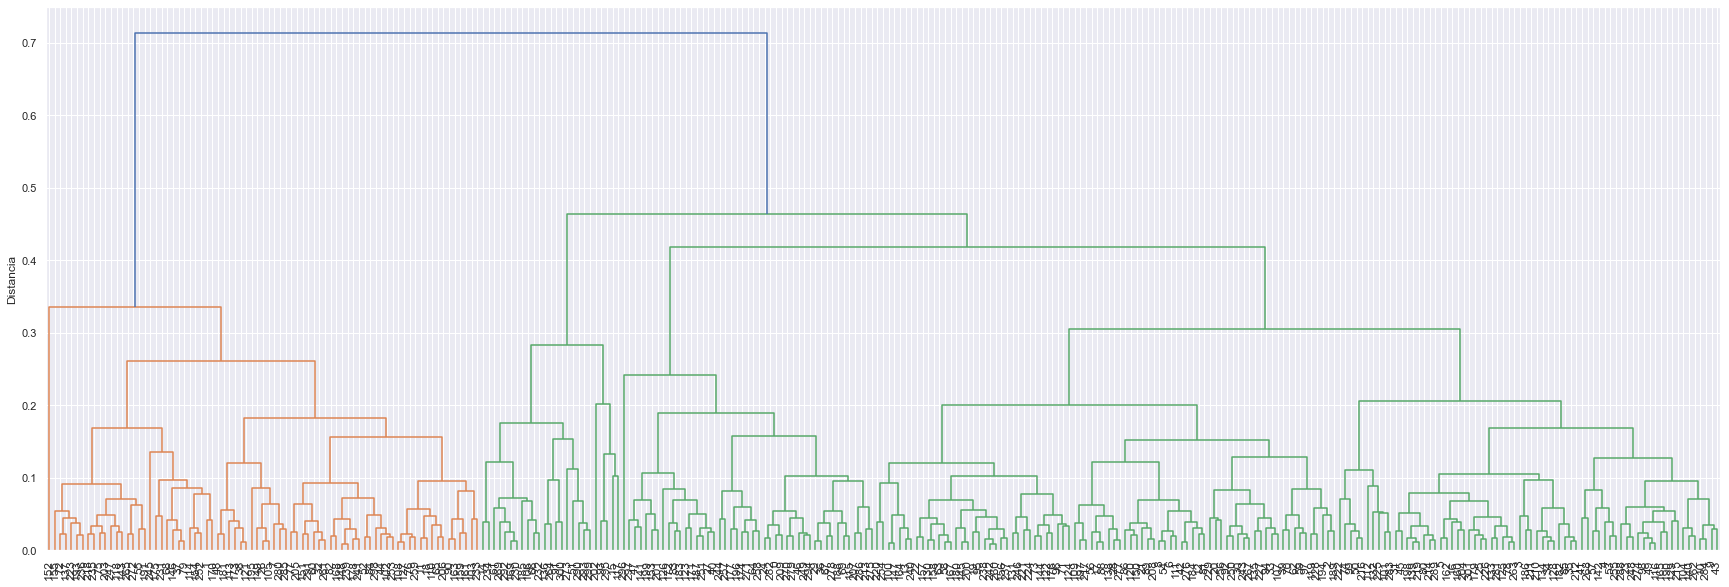

In [35]:
_ = fig, ax = plt.subplots(figsize=(30,10))
_ = dendrogram(mesclagens, leaf_font_size=12, labels=indices, ax=ax)
_ = plt.xticks(rotation=90)
_ = ax.set_ylabel('Distancia')

_____________
## *Passo 6 - Geração dos clusters utilizando o algoritmo DBSCAN*
#### Nessa etapa, o dataset será analisado pelo algoritmo DBSCAN, sendo criados os clusters de acordo com as características das features.

In [36]:
heart_dbscan

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [68.,  1.,  4., ...,  2.,  2.,  7.],
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.]])

In [37]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=20, min_samples=4)
clusters = dbscan.fit_predict(heart_dbscan)
clusters

array([ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  1,  2, -1,  0,  0,  0, -1,  0,  0,  0,  1,  0,  4,  0,  0,
        0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
       -1,  0,  0,  0,  3,  0,  0, -1,  0,  0,  0,  2,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  3,  0,  0,  0, -1,  0,
        0,  4,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,
        3,  0,  0,  0, -1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  3, -1,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
       -1,  4,  0, -1,  0,  1,  0,  0,  0,  4,  0, -1, -1,  0,  0,  0, -1,
        0,  0,  0,  3,  0, -1,  0,  0,  0,  2,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0

In [38]:
# Contagem dos elementos de cada cluster criado

Counter(clusters)

Counter({0: 228, 2: 6, 1: 5, -1: 42, 4: 4, 3: 12})

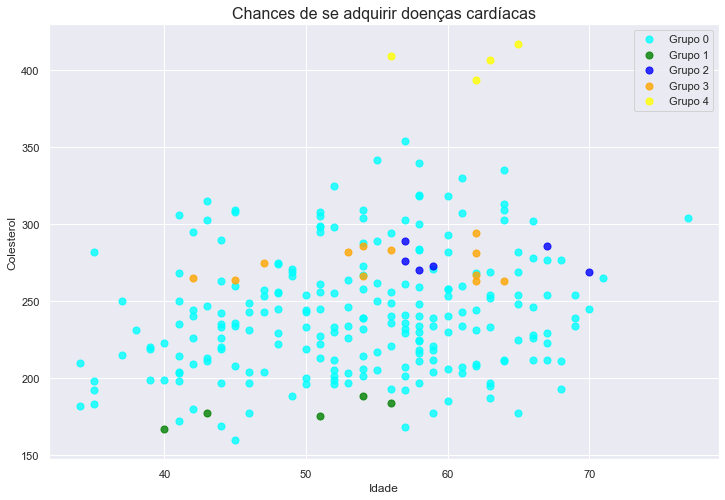

In [39]:
sns.set()
plt.figure(figsize=(12, 8))

plt.scatter(heart_dbscan[clusters == 0, 0], heart_dbscan[clusters == 0, 4], s = 50, c = 'cyan', label = 'Grupo 0', alpha=0.8)
plt.scatter(heart_dbscan[clusters == 1, 0], heart_dbscan[clusters == 1, 4], s = 50, c = 'green', label = 'Grupo 1', alpha=0.8)
plt.scatter(heart_dbscan[clusters == 2, 0], heart_dbscan[clusters == 2, 4], s = 50, c = 'blue', label = 'Grupo 2', alpha=0.8)
plt.scatter(heart_dbscan[clusters == 3, 0], heart_dbscan[clusters == 3, 4], s = 50, c = 'orange', label = 'Grupo 3', alpha=0.8)
plt.scatter(heart_dbscan[clusters == 4, 0], heart_dbscan[clusters == 4, 4], s = 50, c = 'yellow', label = 'Grupo 4', alpha=0.8)

plt.title('Chances de se adquirir doenças cardíacas', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Colesterol', fontsize=12)
plt.legend()
plt.show()

## __*Resultado:*__

### Nenhum dos três algoritmos retornou um resultado satisfatório. Como são conhecidos os agrupamentos originais através da variável-alvo, foi-se possível efetuar a comparação entre os resultados gerados e o valor real da feature, e nenhum deles sequer se aproximou.

### Tal fato pode ser explicado pelas características do dataset, uma vez que cada algoritmo possui suas limitações para o agrupamento ideal. Pode se citar por exemplo que o KMeans não se comporta bem quando os clusters possuem tamanhos variados, diferentes densidades ou tamanhos não-esféricos. A análise do dataset mostrou que diversas features são lineares e até mesmo binárias.

### Assim sendo, apesar do resultado ruim, o KMeans foi o que apresentou um agrupamento menos pior.